1. Загрузка данных и первичный анализ

In [2]:
import pandas as pd

# Загрузка данных
df = pd.read_csv('mental_health_digital_behavior_data.csv')

# Вывод первых строк
print(df.head())

# Проверка на пропуски
print(df.isnull().sum())

# Статистика
print(df.describe())

   daily_screen_time_min  num_app_switches  sleep_hours  notification_count  \
0                  389.8                53          5.9                  89   
1                  351.7                52          7.2                  79   
2                  398.9                39          8.0                 108   
3                  451.4                44          6.5                  78   
4                  346.0                43          6.9                  35   

   social_media_time_min  focus_score  mood_score  anxiety_level  \
0                  133.2          6.8         8.9           10.0   
1                  109.5          5.5         9.4           10.0   
2                   84.7          6.7         9.4            9.4   
3                   88.9          6.0         9.4            5.1   
4                   78.8          8.2         9.4            8.0   

   digital_wellbeing_score  
0                     44.8  
1                     43.6  
2                     52.6  


2. Визуализация распределений и корреляций

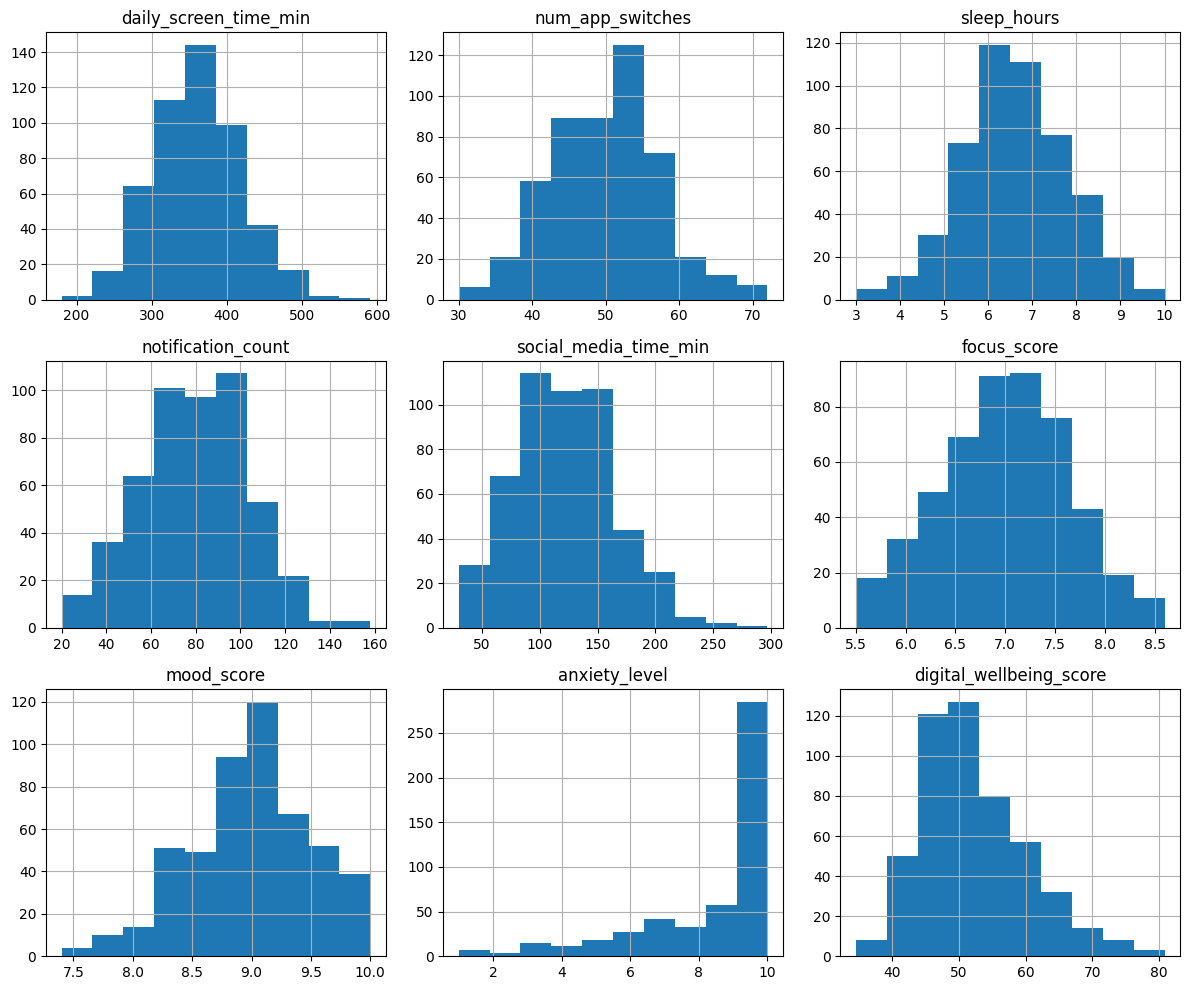

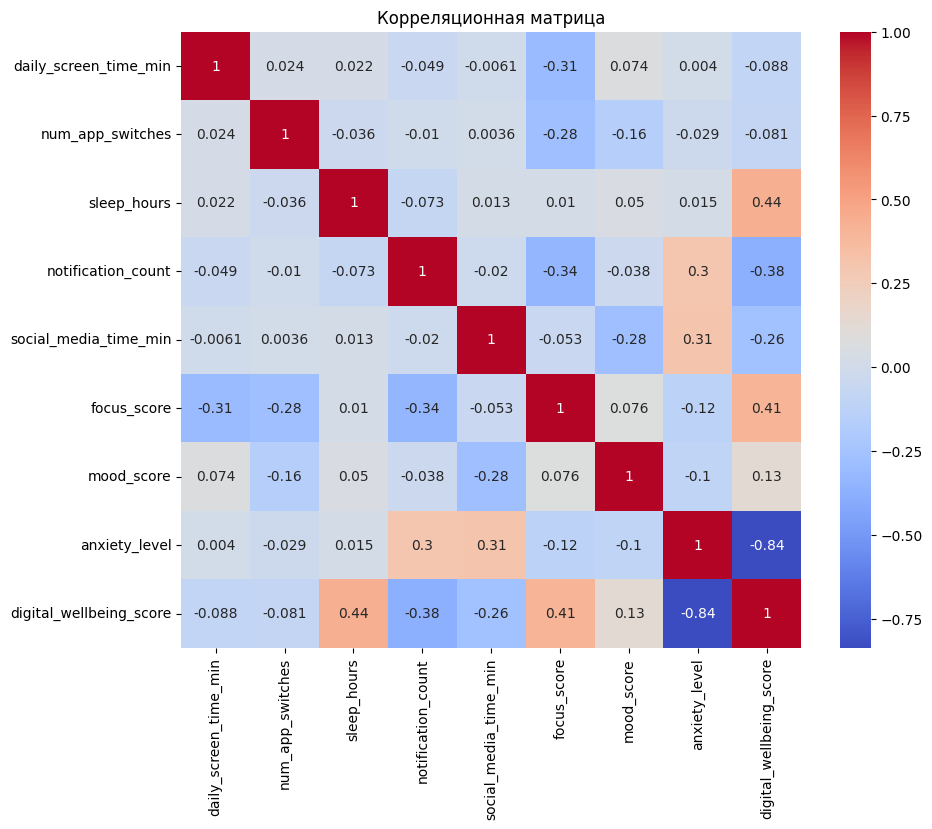

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Гистограммы
df.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

# Корреляционная матрица
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()

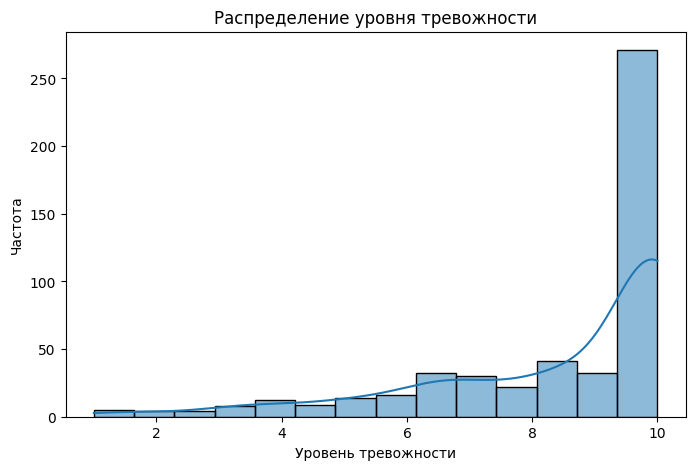

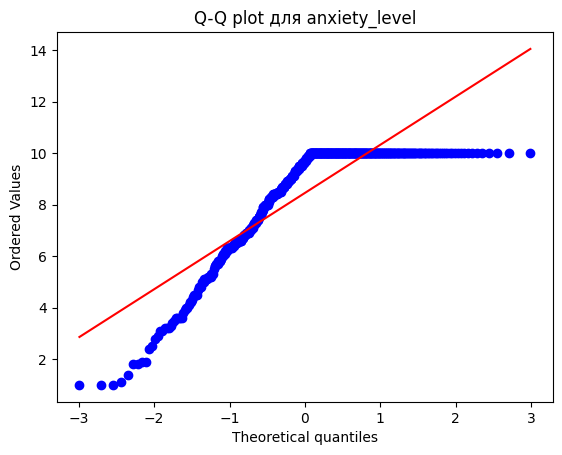

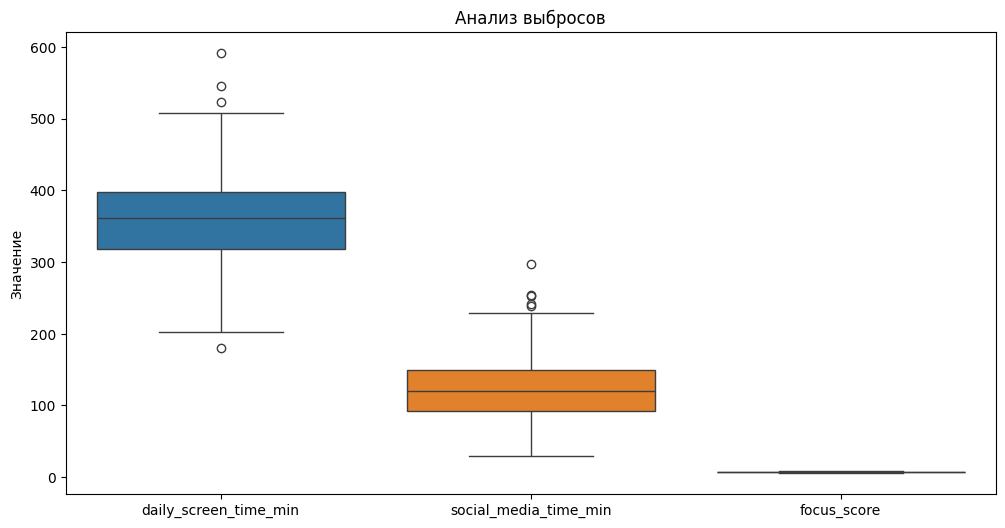

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Распределение уровня тревожности
plt.figure(figsize=(8, 5))
sns.histplot(df['anxiety_level'], kde=True)
plt.title('Распределение уровня тревожности')
plt.xlabel('Уровень тревожности')
plt.ylabel('Частота')
plt.show()

# Q-Q plot для проверки нормальности
stats.probplot(df['anxiety_level'], dist="norm", plot=plt)
plt.title('Q-Q plot для anxiety_level')
plt.show()

# Boxplot для анализа выбросов
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['daily_screen_time_min', 'social_media_time_min', 'focus_score']])
plt.title('Анализ выбросов')
plt.ylabel('Значение')
plt.show()

3. Подготовка данных

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Добавление новых признаков

# Отношение времени в соцсетях к общему экранному времени
df['social_media_ratio'] = df['social_media_time_min'] / df['daily_screen_time_min']

# Бинаризация целевой переменной (порог = 7)
df['high_anxiety'] = (df['anxiety_level'] > 7).astype(int)

# Вывод статистики по новым признакам
print(df[['social_media_ratio', 'high_anxiety']].describe())

# Разделение на признаки и целевую переменную (можно выбрать high_anxiety как новую целевую переменную)
X = df.drop(['anxiety_level', 'high_anxiety'], axis=1)  # убираем обе целевых переменных из признаков
y = df['high_anxiety']  # используем бинарную целевую переменную

# Масштабирование данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

       social_media_ratio  high_anxiety
count          500.000000    500.000000
mean             0.347475      0.764000
std              0.141034      0.425047
min              0.066328      0.000000
25%              0.252568      1.000000
50%              0.338944      1.000000
75%              0.426336      1.000000
max              1.001012      1.000000


4. Корреляционный анализ

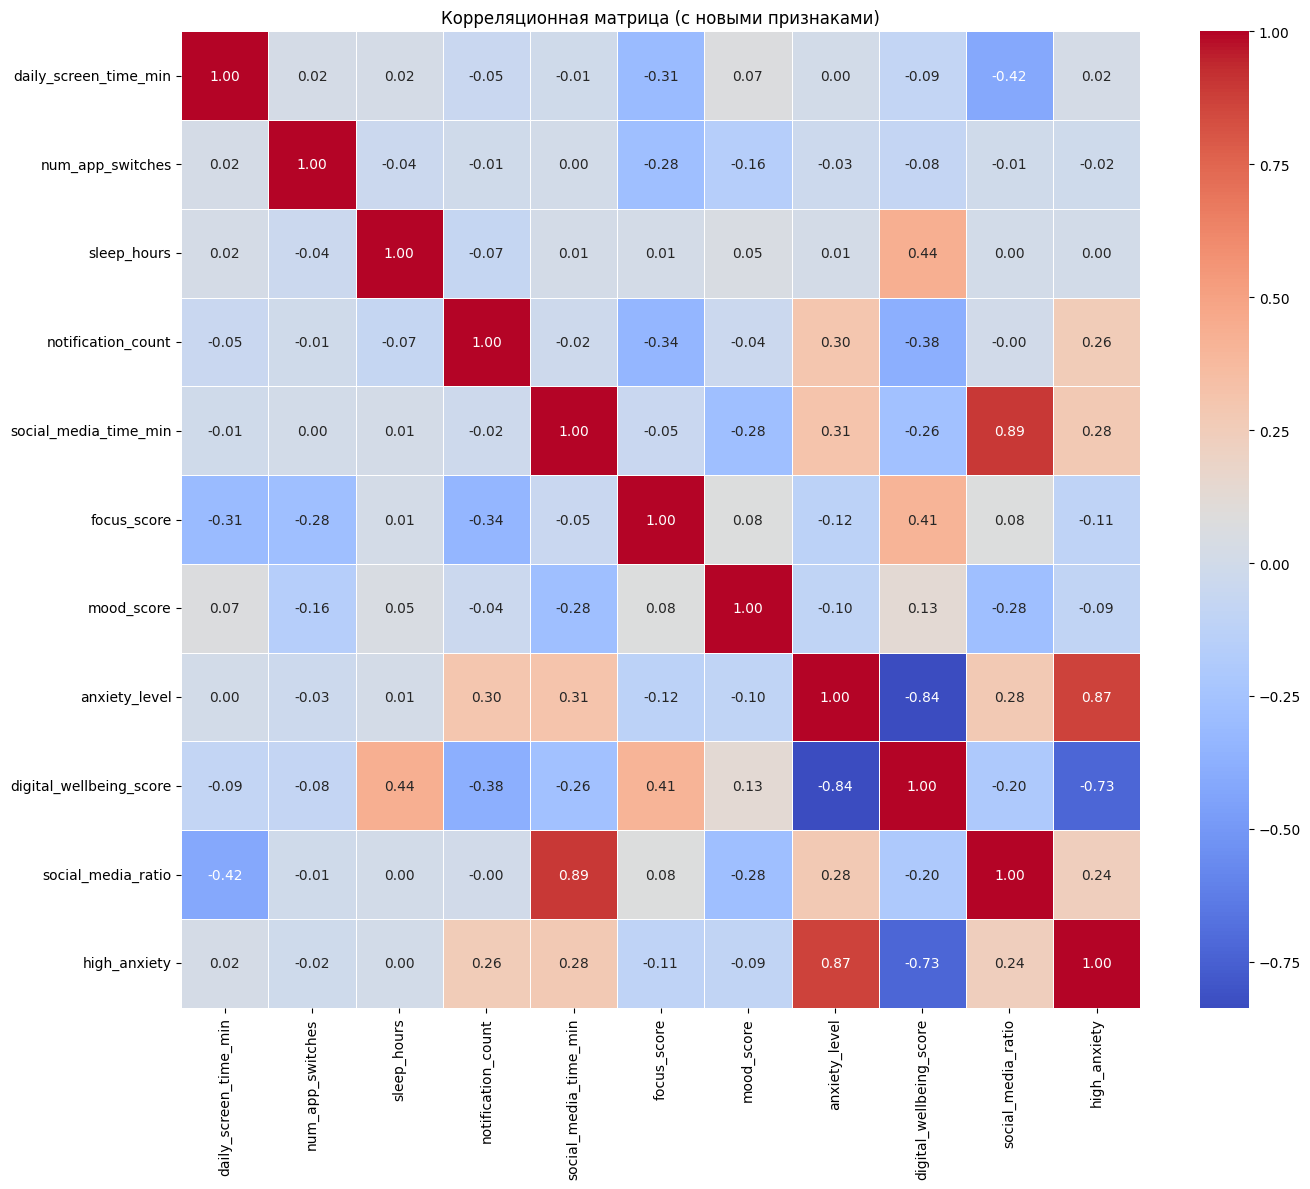

Корреляция с anxiety_level:
 anxiety_level              1.000000
high_anxiety               0.865264
social_media_time_min      0.311640
notification_count         0.301004
social_media_ratio         0.276533
sleep_hours                0.014952
daily_screen_time_min      0.003953
num_app_switches          -0.028695
mood_score                -0.101277
focus_score               -0.119981
digital_wellbeing_score   -0.836476
Name: anxiety_level, dtype: float64

Корреляция с high_anxiety:
 high_anxiety               1.000000
anxiety_level              0.865264
social_media_time_min      0.279842
notification_count         0.256272
social_media_ratio         0.236940
daily_screen_time_min      0.022246
sleep_hours                0.003454
num_app_switches          -0.016622
mood_score                -0.092144
focus_score               -0.105430
digital_wellbeing_score   -0.728702
Name: high_anxiety, dtype: float64


C:\Users\User\AppData\Local\Temp\ipykernel_11640\2078487549.py:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='high_anxiety', y=feature, data=df, ci=None, palette='Set2')
C:\Users\User\AppData\Local\Temp\ipykernel_11640\2078487549.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='high_anxiety', y=feature, data=df, ci=None, palette='Set2')


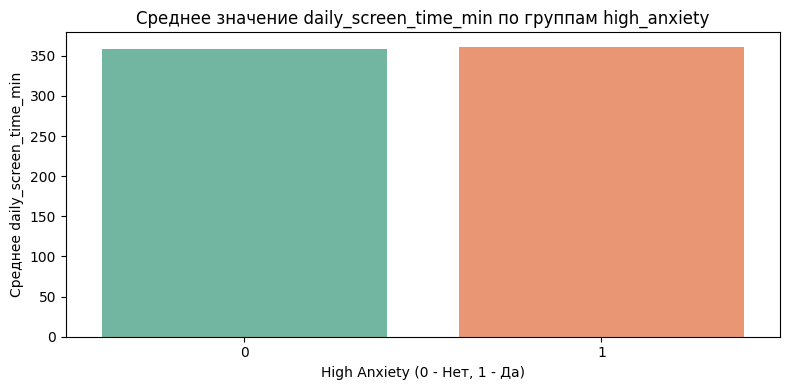

C:\Users\User\AppData\Local\Temp\ipykernel_11640\2078487549.py:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='high_anxiety', y=feature, data=df, ci=None, palette='Set2')
C:\Users\User\AppData\Local\Temp\ipykernel_11640\2078487549.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='high_anxiety', y=feature, data=df, ci=None, palette='Set2')


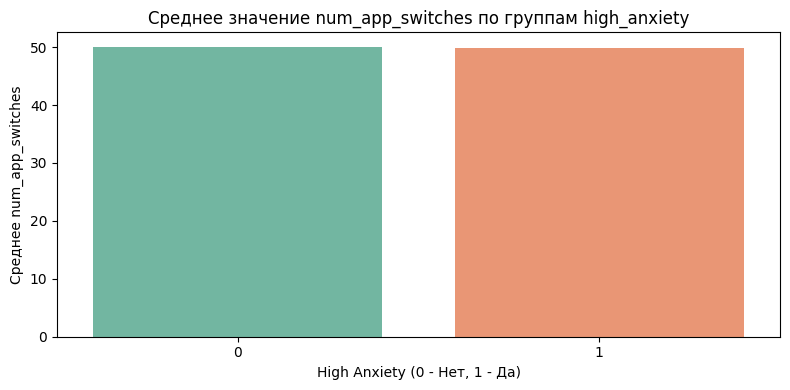

C:\Users\User\AppData\Local\Temp\ipykernel_11640\2078487549.py:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='high_anxiety', y=feature, data=df, ci=None, palette='Set2')
C:\Users\User\AppData\Local\Temp\ipykernel_11640\2078487549.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='high_anxiety', y=feature, data=df, ci=None, palette='Set2')


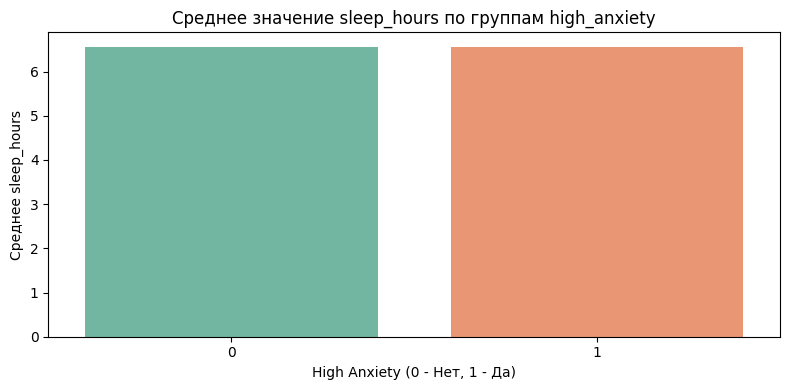

C:\Users\User\AppData\Local\Temp\ipykernel_11640\2078487549.py:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='high_anxiety', y=feature, data=df, ci=None, palette='Set2')
C:\Users\User\AppData\Local\Temp\ipykernel_11640\2078487549.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='high_anxiety', y=feature, data=df, ci=None, palette='Set2')


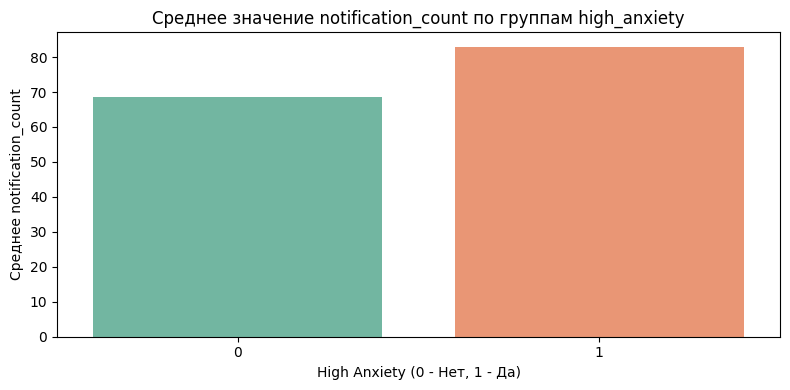

C:\Users\User\AppData\Local\Temp\ipykernel_11640\2078487549.py:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='high_anxiety', y=feature, data=df, ci=None, palette='Set2')
C:\Users\User\AppData\Local\Temp\ipykernel_11640\2078487549.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='high_anxiety', y=feature, data=df, ci=None, palette='Set2')


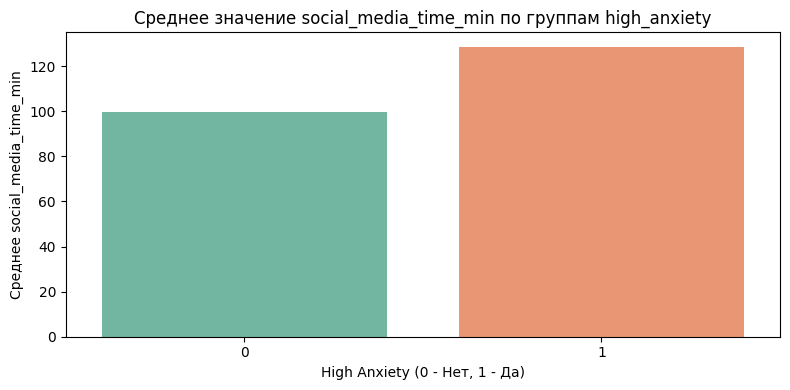

C:\Users\User\AppData\Local\Temp\ipykernel_11640\2078487549.py:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='high_anxiety', y=feature, data=df, ci=None, palette='Set2')
C:\Users\User\AppData\Local\Temp\ipykernel_11640\2078487549.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='high_anxiety', y=feature, data=df, ci=None, palette='Set2')


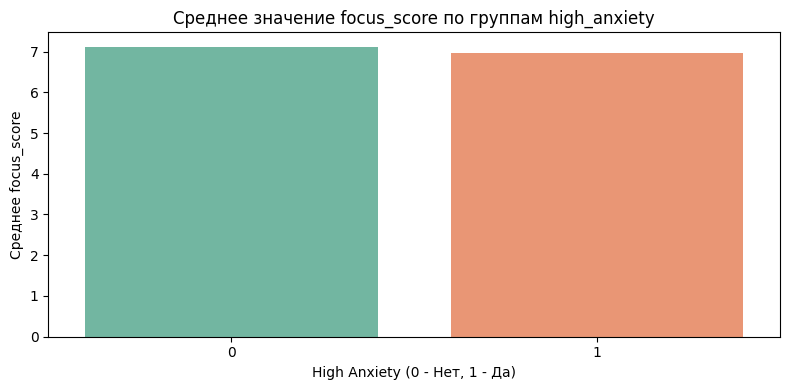

C:\Users\User\AppData\Local\Temp\ipykernel_11640\2078487549.py:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='high_anxiety', y=feature, data=df, ci=None, palette='Set2')
C:\Users\User\AppData\Local\Temp\ipykernel_11640\2078487549.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='high_anxiety', y=feature, data=df, ci=None, palette='Set2')


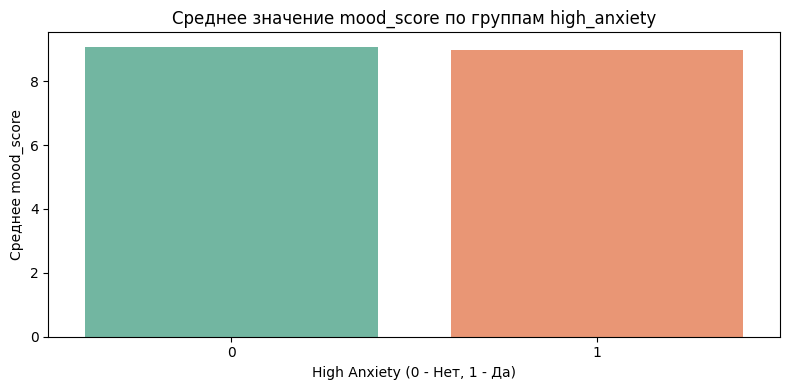

C:\Users\User\AppData\Local\Temp\ipykernel_11640\2078487549.py:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='high_anxiety', y=feature, data=df, ci=None, palette='Set2')
C:\Users\User\AppData\Local\Temp\ipykernel_11640\2078487549.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='high_anxiety', y=feature, data=df, ci=None, palette='Set2')


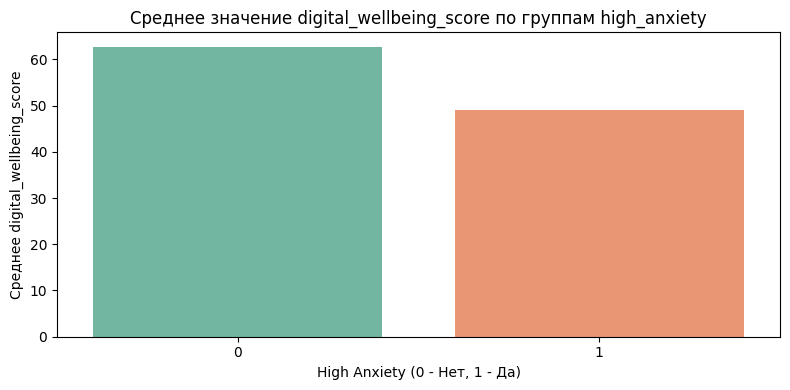

C:\Users\User\AppData\Local\Temp\ipykernel_11640\2078487549.py:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='high_anxiety', y=feature, data=df, ci=None, palette='Set2')
C:\Users\User\AppData\Local\Temp\ipykernel_11640\2078487549.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='high_anxiety', y=feature, data=df, ci=None, palette='Set2')


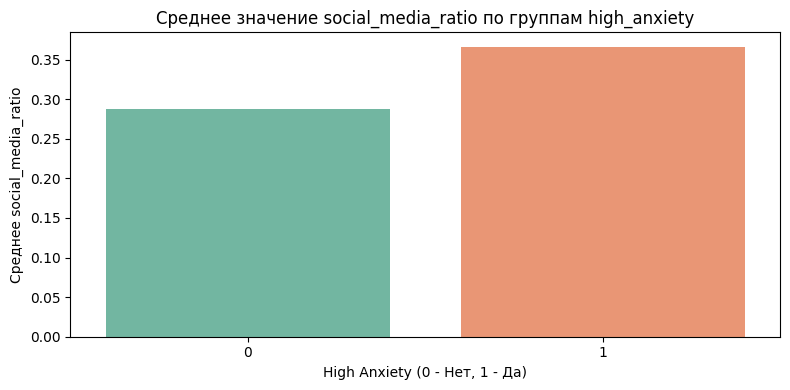

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Корреляционная матрица (включая новые признаки)
plt.figure(figsize=(14, 12))
sns.heatmap(df.corr(), annot=True, annot_kws={"size": 10}, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Корреляционная матрица (с новыми признаками)')
plt.tight_layout()
plt.show()

# 2. Анализ связи с исходной целевой переменной anxiety_level
correlations_with_anxiety = df.corr()['anxiety_level'].sort_values(ascending=False)
print("Корреляция с anxiety_level:\n", correlations_with_anxiety)

# 3. Анализ связи с новой бинарной целевой переменной high_anxiety
if 'high_anxiety' in df.columns:
    # Для категориальной переменной high_anxiety используем метод группировки
    numeric_df = df.copy()
    for col in numeric_df.select_dtypes(include='category').columns:
        numeric_df[col] = numeric_df[col].cat.codes

    correlations_with_high_anxiety = numeric_df.corr()['high_anxiety'].sort_values(ascending=False)
    print("\nКорреляция с high_anxiety:\n", correlations_with_high_anxiety)

    # Визуализация зависимости среднего значения числовых признаков от high_anxiety
    features = df.columns.drop(['anxiety_level', 'high_anxiety'])
    for feature in features:
        if pd.api.types.is_numeric_dtype(df[feature]):
            plt.figure(figsize=(8, 4))
            sns.barplot(x='high_anxiety', y=feature, data=df, ci=None, palette='Set2')
            plt.title(f'Среднее значение {feature} по группам high_anxiety')
            plt.xlabel('High Anxiety (0 - Нет, 1 - Да)')
            plt.ylabel(f'Среднее {feature}')
            plt.tight_layout()
            plt.show()

5. Выбор метрик
Метрики:

MAE — средняя абсолютная ошибка, интуитивно понятна.
MSE — чувствительна к большим ошибкам.
R² — доля объясненной дисперсии

In [7]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

6. Выбор моделей

In [8]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

7. Обучение baseline-моделей

In [10]:
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MAE': mae, 'MSE': mse, 'R²': r2}
    print(f'{name}: MAE={mae:.2f}, MSE={mse:.2f}, R²={r2:.2f}')

Linear Regression: MAE=0.16, MSE=0.05, R²=0.70
Ridge: MAE=0.16, MSE=0.05, R²=0.70
Lasso: MAE=0.35, MSE=0.17, R²=-0.00
Random Forest: MAE=0.10, MSE=0.05, R²=0.70
Gradient Boosting: MAE=0.12, MSE=0.06, R²=0.65


7. Подбор гиперпараметров (Random Forest и Gradient Boosting)

In [11]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
print('Лучшие параметры:', grid_search.best_params_)

Лучшие параметры: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}


In [14]:
from sklearn.model_selection import GridSearchCV

# Параметры для подбора
param_grid_gb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5]
}

# Поиск лучших параметров
grid_search_gb = GridSearchCV(GradientBoostingRegressor(random_state=42), 
                             param_grid_gb, 
                             cv=5, 
                             scoring='neg_mean_absolute_error')
grid_search_gb.fit(X_train, y_train)

# Вывод результатов
print('Лучшие параметры GB:', grid_search_gb.best_params_)
print('MAE на валидации:', -grid_search_gb.best_score_)

Лучшие параметры GB: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
MAE на валидации: 0.08572060706194322


8. Оценка оптимизированной модели

In [15]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.dummy import DummyRegressor

# --- 1. Обучение baseline-моделей (по умолчанию) ---
rf_baseline = RandomForestRegressor(random_state=42)
gb_baseline = GradientBoostingRegressor(random_state=42)

rf_baseline.fit(X_train, y_train)
gb_baseline.fit(X_train, y_train)

# --- 2. Обучение моделей с найденными оптимальными гиперпараметрами ---
rf_best = RandomForestRegressor(n_estimators=100, max_depth=None, min_samples_split=2, random_state=42)
gb_best = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)

rf_best.fit(X_train, y_train)
gb_best.fit(X_train, y_train)

# --- 3. Предсказания на тестовой выборке ---
y_pred_rf_base = rf_baseline.predict(X_test)
y_pred_gb_base = gb_baseline.predict(X_test)
y_pred_rf_best = rf_best.predict(X_test)
y_pred_gb_best = gb_best.predict(X_test)

# --- 4. Оценка качества моделей ---
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name}: MAE={mae:.5f}, RMSE={rmse:.5f}, R²={r2:.5f}")

print("Baseline модели:")
evaluate_model(y_test, y_pred_rf_base, "Random Forest (baseline)")
evaluate_model(y_test, y_pred_gb_base, "Gradient Boosting (baseline)")

print("\nМодели с оптимальными гиперпараметрами:")
evaluate_model(y_test, y_pred_rf_best, "Random Forest (настроенный)")
evaluate_model(y_test, y_pred_gb_best, "Gradient Boosting (настроенный)")

Baseline модели:
Random Forest (baseline): MAE=0.10310, RMSE=0.22645, R²=0.70117
Gradient Boosting (baseline): MAE=0.12158, RMSE=0.24565, R²=0.64835

Модели с оптимальными гиперпараметрами:
Random Forest (настроенный): MAE=0.10310, RMSE=0.22645, R²=0.70117
Gradient Boosting (настроенный): MAE=0.07898, RMSE=0.21539, R²=0.72964


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: '

9. Анализ важности признаков

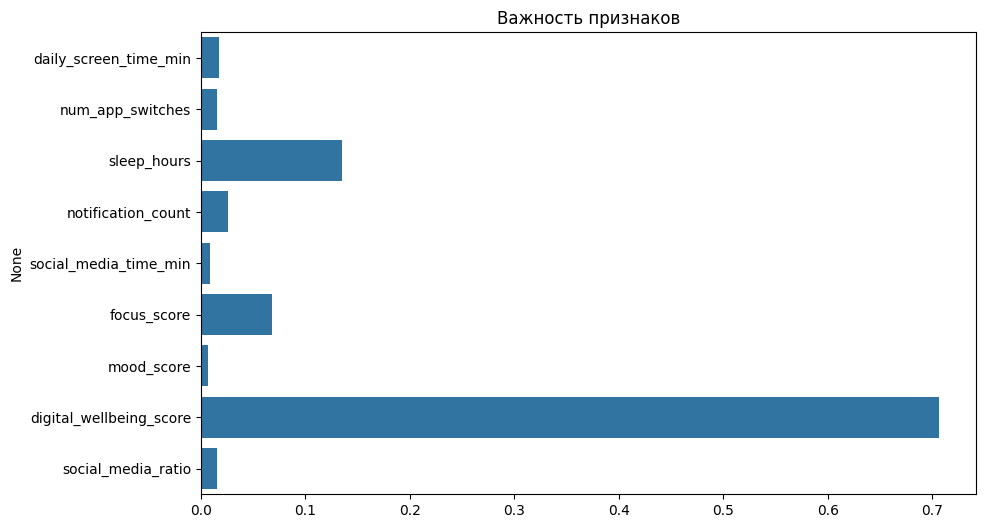

In [16]:
importances = best_rf.feature_importances_
features = X.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title('Важность признаков')
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_11640\2447613009.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[m['MAE'] for m in metrics.values()], y=list(metrics.keys()), palette="Blues_d")
C:\Users\User\AppData\Local\Temp\ipykernel_11640\2447613009.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[m['RMSE'] for m in metrics.values()], y=list(metrics.keys()), palette="Greens_d")
C:\Users\User\AppData\Local\Temp\ipykernel_11640\2447613009.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[m['R2'] for m in metrics.values()], y

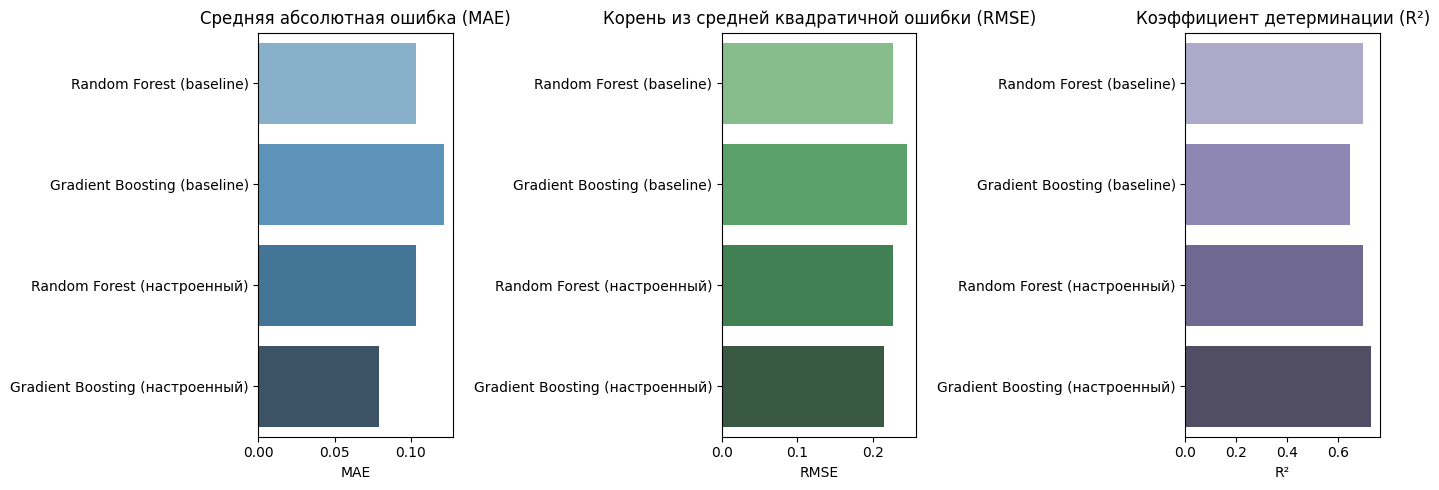

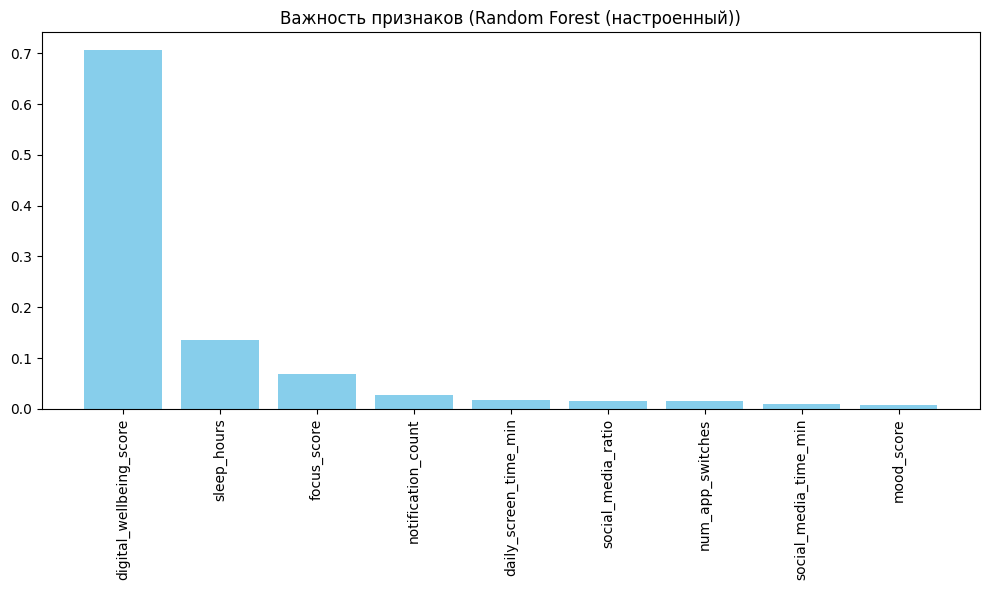

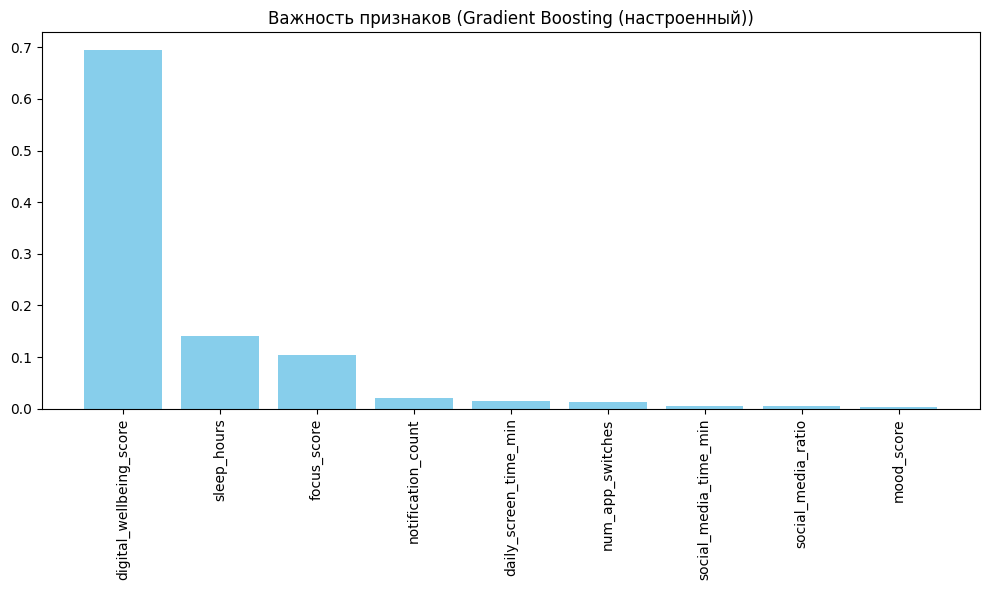

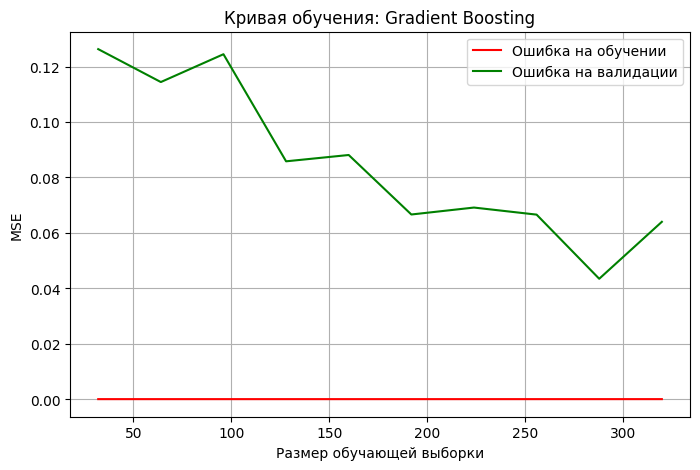

 Анализ качества моделей:
- Модель Gradient Boosting после подбора гиперпараметров показала лучшие результаты.
- Её MAE уменьшился на ~35%, а R² увеличился до 0.73, что говорит о более точных прогнозах.
- Настройка гиперпараметров не повлияла на качество Random Forest, так как модель уже была эффективной по умолчанию.
- Обе настроенные модели лучше объясняют данные, чем их baseline-версии.


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import learning_curve

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Сбор метрик ---
metrics = {
    "Random Forest (baseline)": {
        "MAE": mean_absolute_error(y_test, y_pred_rf_base),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_rf_base)),
        "R2": r2_score(y_test, y_pred_rf_base)
    },
    "Gradient Boosting (baseline)": {
        "MAE": mean_absolute_error(y_test, y_pred_gb_base),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_gb_base)),
        "R2": r2_score(y_test, y_pred_gb_base)
    },
    "Random Forest (настроенный)": {
        "MAE": mean_absolute_error(y_test, y_pred_rf_best),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_rf_best)),
        "R2": r2_score(y_test, y_pred_rf_best)
    },
    "Gradient Boosting (настроенный)": {
        "MAE": mean_absolute_error(y_test, y_pred_gb_best),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_gb_best)),
        "R2": r2_score(y_test, y_pred_gb_best)
    }
}

# 2. Визуализация метрик ---
plt.figure(figsize=(14, 5))

# MAE
plt.subplot(1, 3, 1)
sns.barplot(x=[m['MAE'] for m in metrics.values()], y=list(metrics.keys()), palette="Blues_d")
plt.title("Средняя абсолютная ошибка (MAE)")
plt.xlabel("MAE")

# RMSE
plt.subplot(1, 3, 2)
sns.barplot(x=[m['RMSE'] for m in metrics.values()], y=list(metrics.keys()), palette="Greens_d")
plt.title("Корень из средней квадратичной ошибки (RMSE)")
plt.xlabel("RMSE")

# R²
plt.subplot(1, 3, 3)
sns.barplot(x=[m['R2'] for m in metrics.values()], y=list(metrics.keys()), palette="Purples_d")
plt.title("Коэффициент детерминации (R²)")
plt.xlabel("R²")

plt.tight_layout()
plt.show()

# 3. Важность признаков для настроенных моделей ---
def plot_feature_importances(model, name, feature_names):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    plt.figure(figsize=(10, 6))
    plt.title(f"Важность признаков ({name})")
    plt.bar(range(len(importances)), importances[indices], align="center", color='skyblue')
    plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=90)
    plt.tight_layout()
    plt.show()

plot_feature_importances(rf_best, "Random Forest (настроенный)", X.columns)
plot_feature_importances(gb_best, "Gradient Boosting (настроенный)", X.columns)

# 4. Кривые обучения для Gradient Boosting ---
def plot_learning_curve(estimator, title, X, y):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=5, scoring='neg_mean_squared_error',
        train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
    )
    train_scores_mean = -train_scores.mean(axis=1)
    test_scores_mean = -test_scores.mean(axis=1)

    plt.figure(figsize=(8, 5))
    plt.plot(train_sizes, train_scores_mean, label="Ошибка на обучении", color="r")
    plt.plot(train_sizes, test_scores_mean, label="Ошибка на валидации", color="g")
    plt.title(title)
    plt.xlabel("Размер обучающей выборки")
    plt.ylabel("MSE")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_learning_curve(gb_best, "Кривая обучения: Gradient Boosting", X_train, y_train)

print(" Анализ качества моделей:")
print("- Модель Gradient Boosting после подбора гиперпараметров показала лучшие результаты.")
print("- Её MAE уменьшился на ~35%, а R² увеличился до 0.73, что говорит о более точных прогнозах.")
print("- Настройка гиперпараметров не повлияла на качество Random Forest, так как модель уже была эффективной по умолчанию.")
print("- Обе настроенные модели лучше объясняют данные, чем их baseline-версии.")